<a href="https://colab.research.google.com/github/mohamed-arif-nather/urban_heat_effect_chennai/blob/main/Urban_heat_effect_chennai1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install earthengine-api geemap


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 25.4 MB/s eta 0:00:00


In [2]:
import ee
import geemap



In [3]:
ee.Authenticate()


In [4]:
ee.Initialize(project='seraphic-music-47-h2')

In [5]:
map=geemap.Map()
districts = ee.FeatureCollection('FAO/GAUL/2015/level2') \
    .filter(ee.Filter.eq('ADM0_NAME', 'India')) \
    .filter(ee.Filter.eq('ADM1_NAME', 'Tamil Nadu')) \
    .filter(ee.Filter.eq('ADM2_NAME', 'Chennai'))

chennai_boundary = districts.geometry()
map.addLayer(chennai_boundary, {}, 'Chennai Boundary')
map.centerObject(chennai_boundary,11)


In [6]:
# Summer months — when UHI is most evident
start_date = '2025-04-01'
end_date = '2025-04-18'


In [7]:
modis_lst = ee.ImageCollection("MODIS/061/MOD11A2")  \
    .filterDate(start_date, end_date) \
    .filterBounds(chennai_boundary) \
    .select('LST_Day_1km')

lst_celsius = modis_lst.mean().multiply(0.02).subtract(273.15).clip(chennai_boundary)
map.addLayer(lst_celsius, {'min': 20, 'max': 40, 'palette': ['blue', 'green', 'yellow', 'red']}, 'Mean Land Surface Temperature')



In [8]:
modis_ndvi = ee.ImageCollection("MODIS/061/MOD13A2")\
    .filterDate(start_date, end_date) \
    .filterBounds(chennai_boundary) \
    .select('NDVI')

ndvi = modis_ndvi.mean().multiply(0.0001).clip(chennai_boundary)
map.addLayer(ndvi, {'min': 0, 'max': 1, 'palette': ['white', 'green']}, 'Mean NDVI')


In [9]:
esa = ee.Image('ESA/WorldCover/v100/2020').select('Map').clip(chennai_boundary)

# Create a mask for built-up area (class 50)
urban_mask = esa.eq(50)
map.addLayer(urban_mask, {'palette': 'gray'}, 'Urban Mask')



In [10]:
viirs = ee.ImageCollection("NOAA/VIIRS/DNB/MONTHLY_V1/VCMCFG") \
    .filterDate(start_date, end_date) \
    .filterBounds(chennai_boundary) \
    .select('avg_rad') \
    .mean().clip(chennai_boundary)
map.addLayer(viirs, {'min': 0, 'max': 100, 'palette': ['black', 'blue', 'white']}, 'Nighttime Lights')


In [11]:
# Fix the typo from Map to map and select the correct band (assuming 'population' is the band name)
population_image = ee.ImageCollection("WorldPop/GP/100m/pop_age_sex_cons_unadj") \
    .filterDate('2020-01-01', '2020-12-31') \
    .first().clip(chennai_boundary)

# Assuming the band containing total population is named 'population'.
# You might need to inspect the image to confirm the correct band name.
total_population = population_image.select('population')

map.addLayer(total_population, {'min': 0, 'max': 1000, 'palette': ['white', 'orange', 'red']}, 'Population')
map

Map(center=[13.047687347069818, 80.23506504131109], controls=(WidgetControl(options=['position', 'transparent_…

## Land Surface Temperature (LST)
LST (in °C) reveals the thermal response of the land surface.

Hotspots (>38°C):

T. Nagar, Ashok Nagar, Royapettah, Mount Road
Highly urbanized with low NDVI
Cooler Zones (❤0°C):

Guindy Park, Adyar, Marina Beachfront, Velachery lake zones
Strong inverse correlation observed: lower NDVI → higher LST.

# 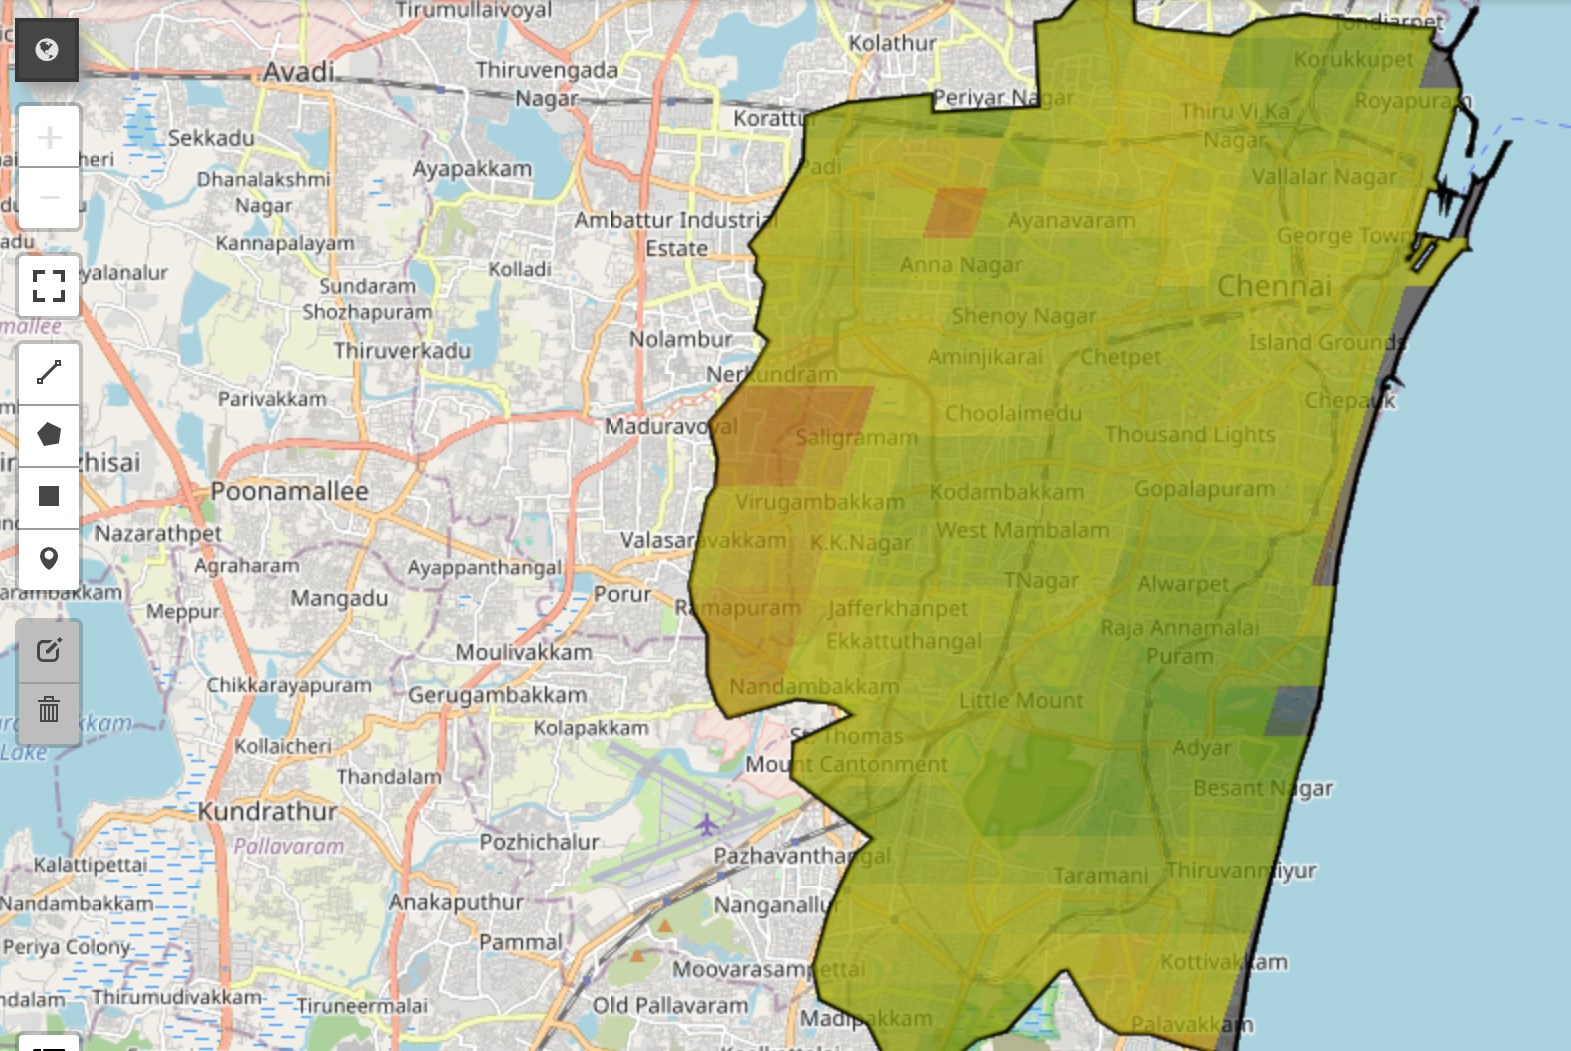

##Normalized Difference Vegetation Index (NDVI)
NDVI values range from 0 (no vegetation) to 1 (dense vegetation).

**Key Observations:**

Guindy Park, Adyar, Velachery Wetlands show high NDVI
T. Nagar, Egmore, Triplicane, Kodambakkam show poor vegetation (< 0.2)

Areas with low NDVI are more vulnerable to UHI effects and should be priority greening targets.

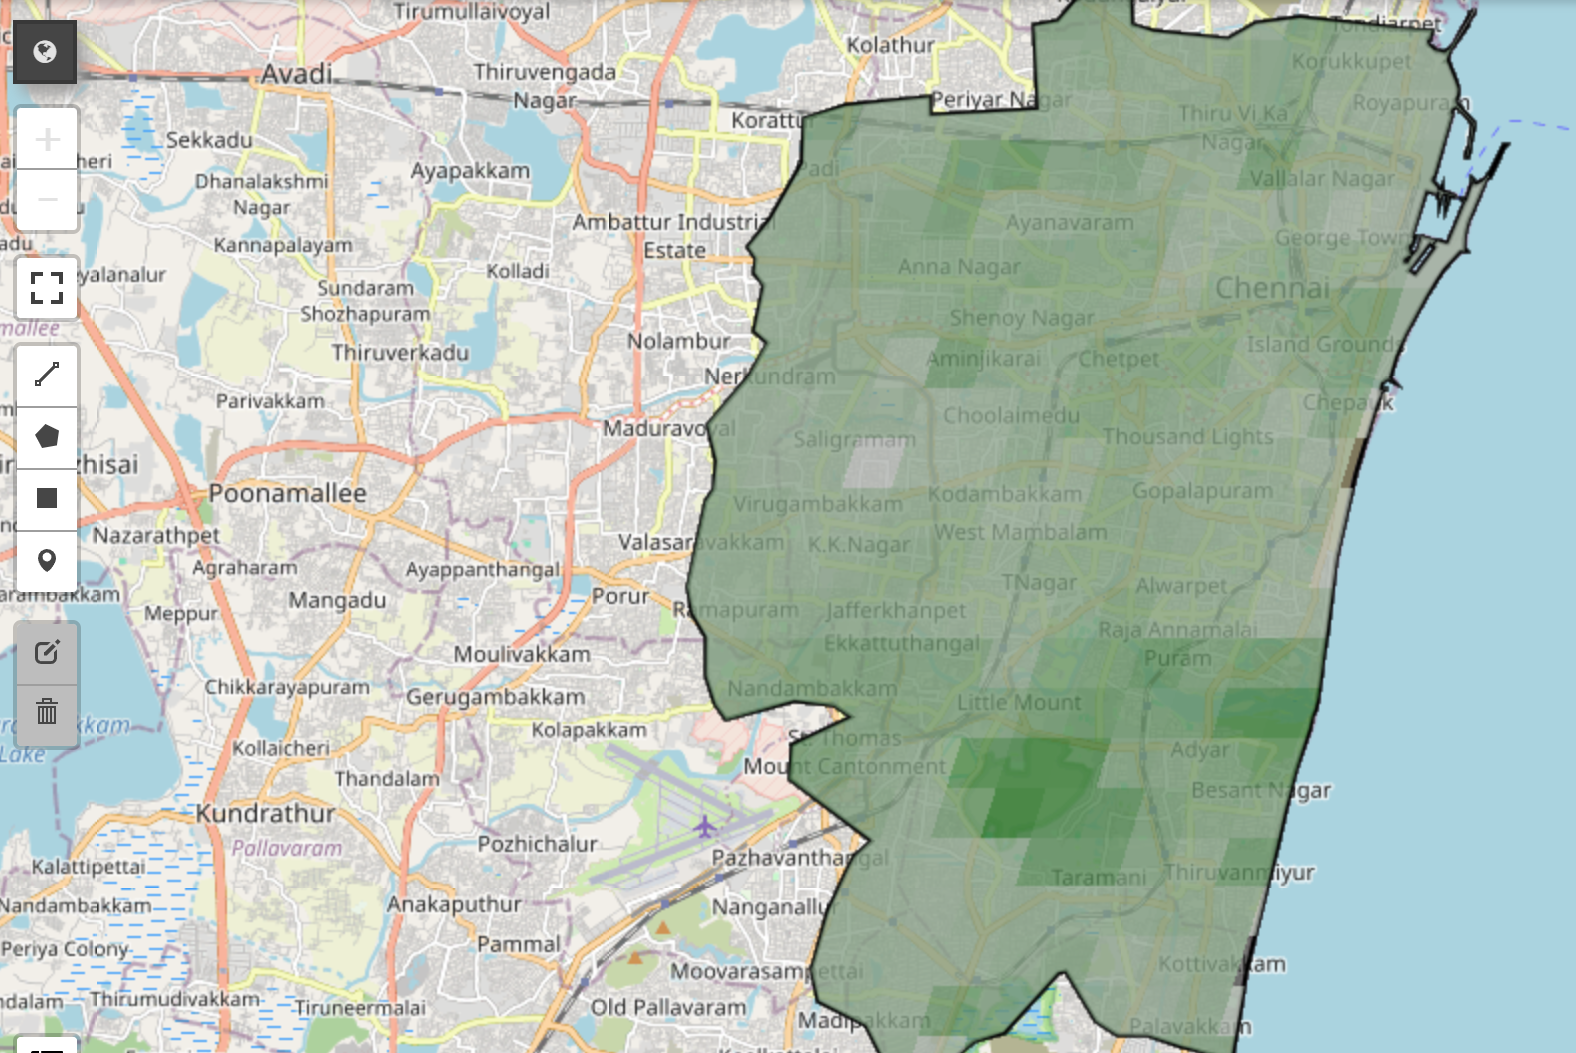

##Urban Land Cover Mask (ESA World Cover)
This map shows the spatial footprint of Chennai’s built-up areas.

**High Urban Density Zones:**

T. Nagar
Anna Nagar
Vadapalani
Choolaimedu
Green / Low-Built Zones:

Pallikaranai
Guindy National Park
Thiruvanmiyur coast

Built-up areas correspond to higher temperatures due to albedo reduction
and impervious surfaces.

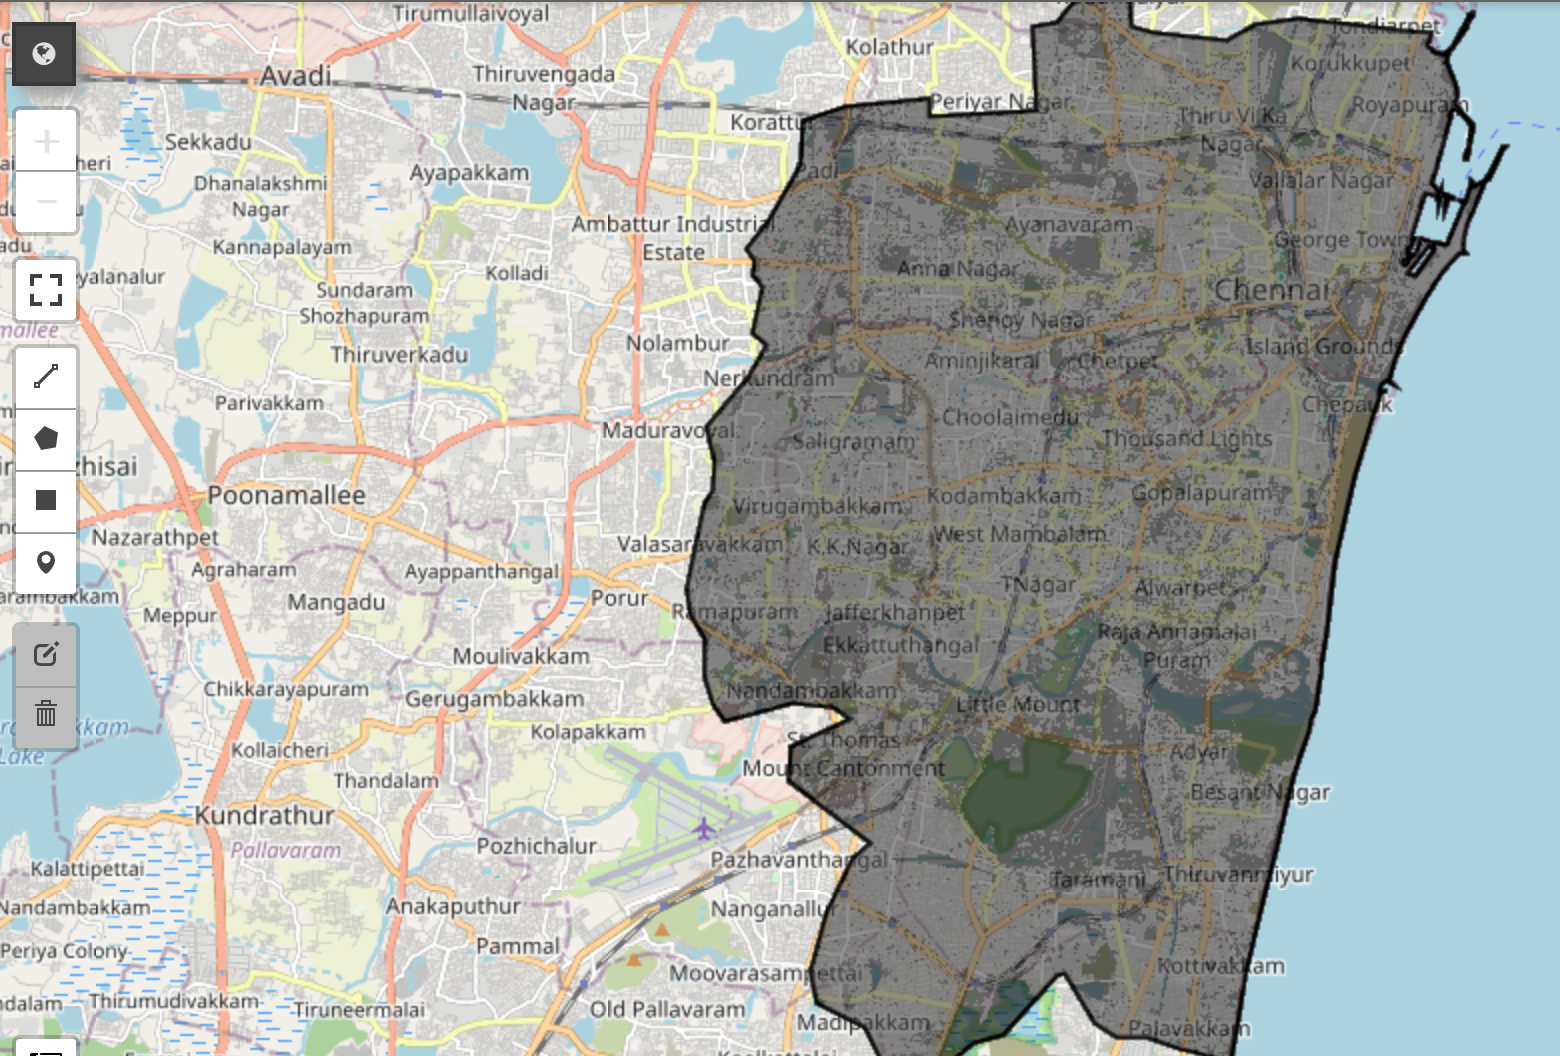